<ipython-input-12-776ef614aacd>:14: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


Done new v6


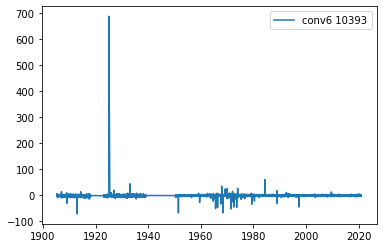

Done old v5


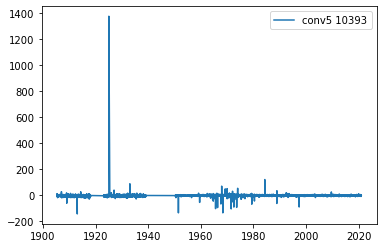

61085 35510870 503631
Done old v5


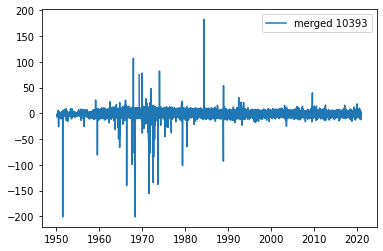

61085 35510870 564985
Done old v5


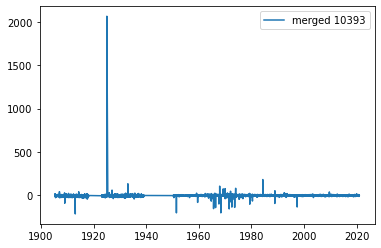

In [12]:
""" Example to analyze Desroziers uncertainty from file """

import os,sys
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import h5py as h5
from datetime import datetime
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

f_conv = '/raid60/scratch/leo/scratch/converted_v6/0-20001-0-10393_CEUAS_merged_v1.nc'
f_conv_old = '/raid60/scratch/leo/scratch/converted_v5/0-20001-0-10393_CEUAS_merged_v1.nc'
merged = '/raid60/scratch/federico/MERGED_JUNE2021/0-20001-0-10393_CEUAS_merged_v1.nc'


    


f = h5.File(f_conv)
indices = f['recordindices']['85']
imin, imax = min(indices) , max(indices) # I miss here the last entr since I would need the exact index 
dt_conv = f['observations_table']['date_time'][imin:imax]

ind = np.where(f['observations_table']['z_coordinate'][imin:imax] == 100000)[0]
dt = np.take(f['observations_table']['date_time'][imin:imax], ind ) 
dt = 1900 + dt/(24*60*60 *365.25)
era5fb = np.take(f['era5fb']['an_depar@body'][imin:imax], ind )

plt.plot(dt, era5fb, label = 'conv6 10393' )
print('Done new v6')
plt.legend()
plt.show()
plt.close()

f = h5.File(f_conv_old)
indices = f['recordindices']['85']
imin, imax = min(indices) , max(indices) # I miss here the last entr since I would need the exact index 
dt_conv = f['observations_table']['date_time'][imin:imax]

ind = np.where(f['observations_table']['z_coordinate'][imin:imax] == 100000)[0]
dt = np.take(f['observations_table']['date_time'][imin:imax], ind ) 
dt = 1900 + dt/(24*60*60 *365.25)
era5fb = np.take(f['era5fb']['an_depar@body'][imin:imax], ind )

plt.plot(dt, 2*era5fb, label = 'conv5 10393' )
print('Done old v5')
plt.legend()
plt.show()
plt.close()




f = h5.File(merged)
ind_var = np.where(f['observations_table']['observed_variable'][:]== 85)[0]
ind_p =  np.where(f['observations_table']['z_coordinate'][:] == 100000)[0]
ind_all = np.intersect1d(ind_var,ind_p)
    
print(len(ind_all) , len(ind_var), len(ind_p))

dt = np.take(f['observations_table']['date_time'], ind_all ) 
dt = 1900 + dt/(24*60*60 *365.25)
era5fb = np.take(f['era5fb']['an_depar@body'], ind_all )

plt.plot(dt, 3*era5fb, label = 'merged 10393' )
print('Done old v5')
plt.legend()
plt.show()
plt.close()



f = h5.File(f_conv)
ind_var = np.where(f['observations_table']['observed_variable'][:]== 85)[0]
ind_p =  np.where(f['observations_table']['z_coordinate'][:] == 100000)[0]
ind_all = np.intersect1d(ind_var,ind_p)
    
print(len(ind_all) , len(ind_var), len(ind_p))

dt = np.take(f['observations_table']['date_time'], ind_all ) 
dt = 1900 + dt/(24*60*60 *365.25)
era5fb = np.take(f['era5fb']['an_depar@body'], ind_all )

plt.plot(dt, 3*era5fb, label = 'conv6 10393 other method' )
print('Done old v5')
plt.legend()
plt.show()
plt.close()




